# MFW 2005 + flopy + pyNoxtli
## Luis M. de la Cruz
<font color=#FF0000>**Última actualización: mar may 26 18:01:09 CDT 2020**</font>

En este ejemplo se mostrará cómo leer la salida de MODFLOW y cómo visualizarla usando las herramientas de pyNoxtli.

## Preparamos los datos para la visualización

MODFLOW escribe los resultados en formato binario. Flopy ofrece herramientas para leer esos datos. 

In [1]:
# Importamos las bibliotecas
import numpy as np
import flopy

# Importamos las herramientas de MATPLOTLIB
#import matplotlib.pyplot as plt
#%matplotlib inline

flopy is installed in /home/luiggi/anaconda3/lib/python3.7/site-packages/flopy


In [11]:
# Definimos el nombre de la simulación
modelname = 'ejem_01_MF2005'

# Detalles del ejemplo
Lx = 1000.
Ly = 1000.
nlay = 1
nrow = 20
ncol = 15
delr = Lx/ncol
delc = Ly/nrow

# Definimos el número de contornos a graficar
levels = np.linspace(0.,10.,11)  # Pruebe cambiando el 11

# Definimos la extensión del dominio
extent = (0,Lx,0,Ly)

In [12]:
# Se importa la herramienta para leer los archivos binarios.
import flopy.utils.binaryfile as bf

# Lectura de la salida de MODFLOW
hds = bf.HeadFile(modelname+'.hds')
head = hds.get_data(totim=1.0)

print(type(hds), type(head), sep='\n')

<class 'flopy.utils.binaryfile.HeadFile'>
<class 'numpy.ndarray'>


### Calculamos la velocidad

In [13]:
def Darcy(head, kx, ky):
    """
    Calcula la velocidad de a partir de la carga hidráulica.
    
    Parameters
    ----------
    head: numpy array
    Carga hidráyulica
    
    kx
    --
    Conductividad hidráulica en dirección x.
    
    ky
    --
    Conductividad hidráulica en dirección y.
    
    Returns
    -------
    Tupla con la velocidad, (vx, vy), calculada sobre los centros de las
    celdas de la malla.
    
    """
    vx = np.zeros((nrow-1, ncol-1))
    vy = np.zeros((nrow-1, ncol-1))

    for i in range(0,nrow-1):
        for j in range(0,ncol-1):
            vx[i,j] = - kx * (head[0,i,j+1] - head[0,i,j]) / delc
            vy[i,j] = - ky * (head[0,i+1,j] - head[0,i,j]) / delr

    return vx, vy

In [14]:
print(head)

[[[10.          8.266618    6.592753    5.0561123   3.759347
    2.7926269   2.118562    1.6550728   1.3241142   1.0651025
    0.8399794   0.62799114  0.41925588  0.2100797   0.        ]
  [10.          8.23314     6.5155644   4.921182    3.5736969
    2.6280081   2.0001128   1.5805244   1.2836441   1.0460402
    0.83259106  0.62616134  0.4195039   0.21058793  0.        ]
  [10.          8.171939    6.3690796   4.6473722   3.1620357
    2.2846308   1.7644912   1.436953    1.2098308   1.0133908
    0.8212543   0.62445956  0.42102233  0.21203665  0.        ]
  [10.          8.096562    6.176947    4.240604    2.4084127
    1.7402918   1.4205312   1.2368971   1.1187589   0.97832054
    0.81253785  0.6264943   0.42566174  0.21520157  0.        ]
  [10.          8.030287    5.9942236   3.7752502   1.
    1.          1.          1.          1.040231    0.9575065
    0.8152181   0.63684773  0.43571675  0.2210335   0.        ]
  [10.          8.001332    5.9143867   3.6228023   1.
    1.      

In [15]:
#Cálculo de la velocidad
velx, vely = Darcy(head, kx = 10, ky = 10)

# Malla donde se dibuja la velocidad
x = np.linspace(0+delc*0.5, Lx - delc*0.5, ncol - 1)
y = np.linspace(0+delr*0.5, Ly - delr*0.5, nrow - 1)
xg, yg = np.meshgrid(x,y)

## pyNoxtly
Graficación usando pyNoxtli

In [16]:
# Importamos las herramientas necesarias de pyNoxtli
import os, sys
# WINDOW
#sys.path.insert(0, os.path.abspath('/home/luiggi/GitSites/pynoxtli/base'))
# Linux
sys.path.insert(0, os.path.abspath('/home/luiggi/GitSites/pynoxtli/base'))

from geo.rectangle import Rectangle
import vis.flowix as vis

### Definimos el dominio, creamos la malla y la graficamos 

uMesh


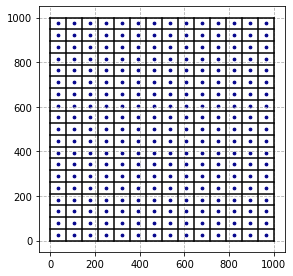

In [17]:
dominio = Rectangle(Lx, Ly)
malla   = dominio.constructMesh(ncol, nrow)

# Visualización con flowix
axis_par = [{'aspect':'equal'}]   
v1 = vis.Plotter(1,1,axis_par)
v1.plot_mesh(1, malla, vol='.', nod='')

In [18]:
print(head.shape)

(1, 20, 15)


### Graficamos los resultados de la salida de MODFLOW

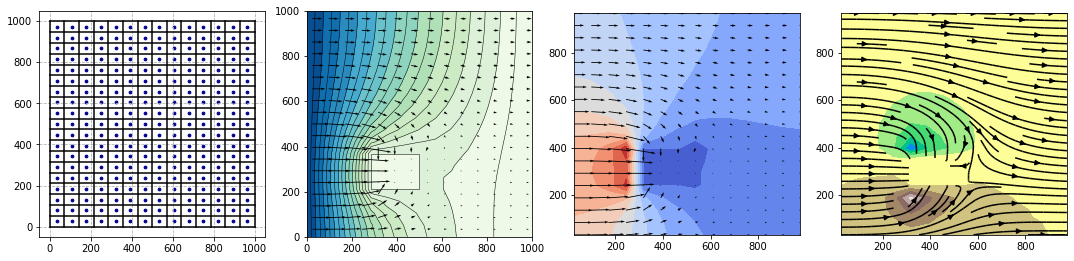

In [21]:
axis_par = [{'aspect':'equal'},
            {'aspect':'equal'},
            {'aspect':'equal'},
            {'aspect':'equal'}]   

xo = np.linspace(0, Lx, ncol)
yo = np.linspace(0, Ly, nrow)

v = vis.Plotter(1,4,axis_par, {'figsize':(15,10)})

v.plot_mesh(1, malla, vol='.', nod='')

con = v.contourf(2,xo,yo,head[0,:,:],{'cmap':'GnBu', 'levels':levels})
v.contour(2,xo,yo,head[0,:,:],{'levels':20,'linewidths':0.5, 'colors':'black'})
v.quiver(2,xg,yg,velx, vely)

v.contourf(3,xg,yg,velx,{'cmap':'coolwarm', 'levels':10})
v.quiver(3,xg,yg,velx,vely)

v.streamplot(4,xg,yg,velx,vely, {'color':'black'})
v.contourf(4,xg,yg,vely,{'cmap':'terrain', 'levels':10})

import matplotlib.pyplot as plt
plt.savefig('flowix.pdf')

### Siguiente paso:

Continuar con el ejercicio de visualización en: <a href="./MF2005-Vis3.ipynb">MF2005-Vis3 </a>